In [172]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import folium

# Data reading for modelling

In [173]:
#importing data
data = pd.read_csv('participant_10_labeled.csv')

C:\Users\ashha\AppData\Local\Temp\ipykernel_18368\20065367.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('participant_10_labeled.csv')


In [174]:
data.shape

(221309, 24)

In [175]:
features = data.columns.values
features

array(['Unnamed: 0', 'Time_Biotrace', 'Time_Videorating', 'Time_Light',
       'Time_Accel', 'Time_GPS', 'AccelX', 'AccelY', 'AccelZ',
       'Lightning', 'Latitude_GPS', 'Longitude_GPS', 'Accuracy_GPS',
       'Altitude_GPS', 'Speed_GPS', 'Bearing_GPS', 'Frame_Videorating',
       'Rating_Videorating', 'ECG', 'SCR', 'Temp', 'HR', 'HRV_LF',
       'target'], dtype=object)

In [176]:
data['target'].value_counts()

target
50         81275
highway    58765
30         35595
50         29810
freeway    14201
30           760
Name: count, dtype: int64

In [177]:
#replce target value from string to int
data['target'] = data['target'].replace('50', int(50))
data['target'] = data['target'].replace('30', int(30))
data['target'] = data['target'].replace('freeway', int(70))
data['target'] = data['target'].replace('highway', int(100))


In [178]:
#drop nan values from data i.e missing values
data = data.dropna()

In [179]:
#sort data by biotrace_time
data = data.sort_values(by=['Time_Biotrace'])

In [180]:
#dropping columns which are not required
data = data.drop(['Unnamed: 0','Time_Videorating', 'Time_Light',
       'Time_Accel', 'Time_GPS','Frame_Videorating',
       'Rating_Videorating'],axis=1)

In [181]:
features = data.columns.values
features

array(['Time_Biotrace', 'AccelX', 'AccelY', 'AccelZ', 'Lightning',
       'Latitude_GPS', 'Longitude_GPS', 'Accuracy_GPS', 'Altitude_GPS',
       'Speed_GPS', 'Bearing_GPS', 'ECG', 'SCR', 'Temp', 'HR', 'HRV_LF',
       'target'], dtype=object)

# Visualizing different features for preprocessing

In [182]:
data.describe()

,AccelX,AccelY,AccelZ,Lightning,Latitude_GPS,Longitude_GPS,Accuracy_GPS,Altitude_GPS,Speed_GPS,Bearing_GPS,ECG,SCR,Temp,HR,HRV_LF,target
count,220406.000000,220406.000000,220406.000000,220406.000000,220406.000000,220406.000000,220406.000000,220406.000000,220406.000000,220406.000000,220406.000000,220406.000000,220406.000000,220406.000000,220406.000000,220406.000000
mean,-0.074593,9.975141,0.210198,505.968167,48.729781,9.125008,13.035852,493.181488,11.665575,195.111716,2748.750440,7.263207,33.244213,88.196979,69.878546,61.320790
std,0.787167,0.419785,0.755009,279.513883,0.011572,0.025738,6.605981,26.968130,8.700289,105.202447,2932.951781,1.665686,0.876971,6.017371,19.724677,25.102734
min,-5.248090,4.290410,-4.462792,4.702822,48.705200,9.064355,5.000000,448.000000,0.063385,0.146499,-18360.830000,2.142000,31.092000,52.829000,11.758000,30.000000
25%,-0.402226,9.787497,-0.095768,343.657680,48.724004,9.108525,10.000000,474.000000,3.884148,105.071290,950.620000,6.015000,32.471000,85.815000,56.990000,50.000000
50%,-0.210690,9.979033,0.210690,456.643250,48.729478,9.130399,10.000000,480.000000,10.341692,222.323150,2075.957500,7.761000,33.371000,87.776000,74.299000,50.000000
75%,0.191536,10.151415,0.555455,576.419000,48.737443,9.146392,15.000000,505.000000,21.441740,284.019440,3675.444500,8.522000,33.878000,89.830000,85.762000,100.000000
max,4.865018,16.491260,3.964798,1654.001200,48.747372,9.167038,50.000000,571.000000,27.549511,359.864560,17301.545000,10.394000,35.460000,150.217000,96.997000,100.000000


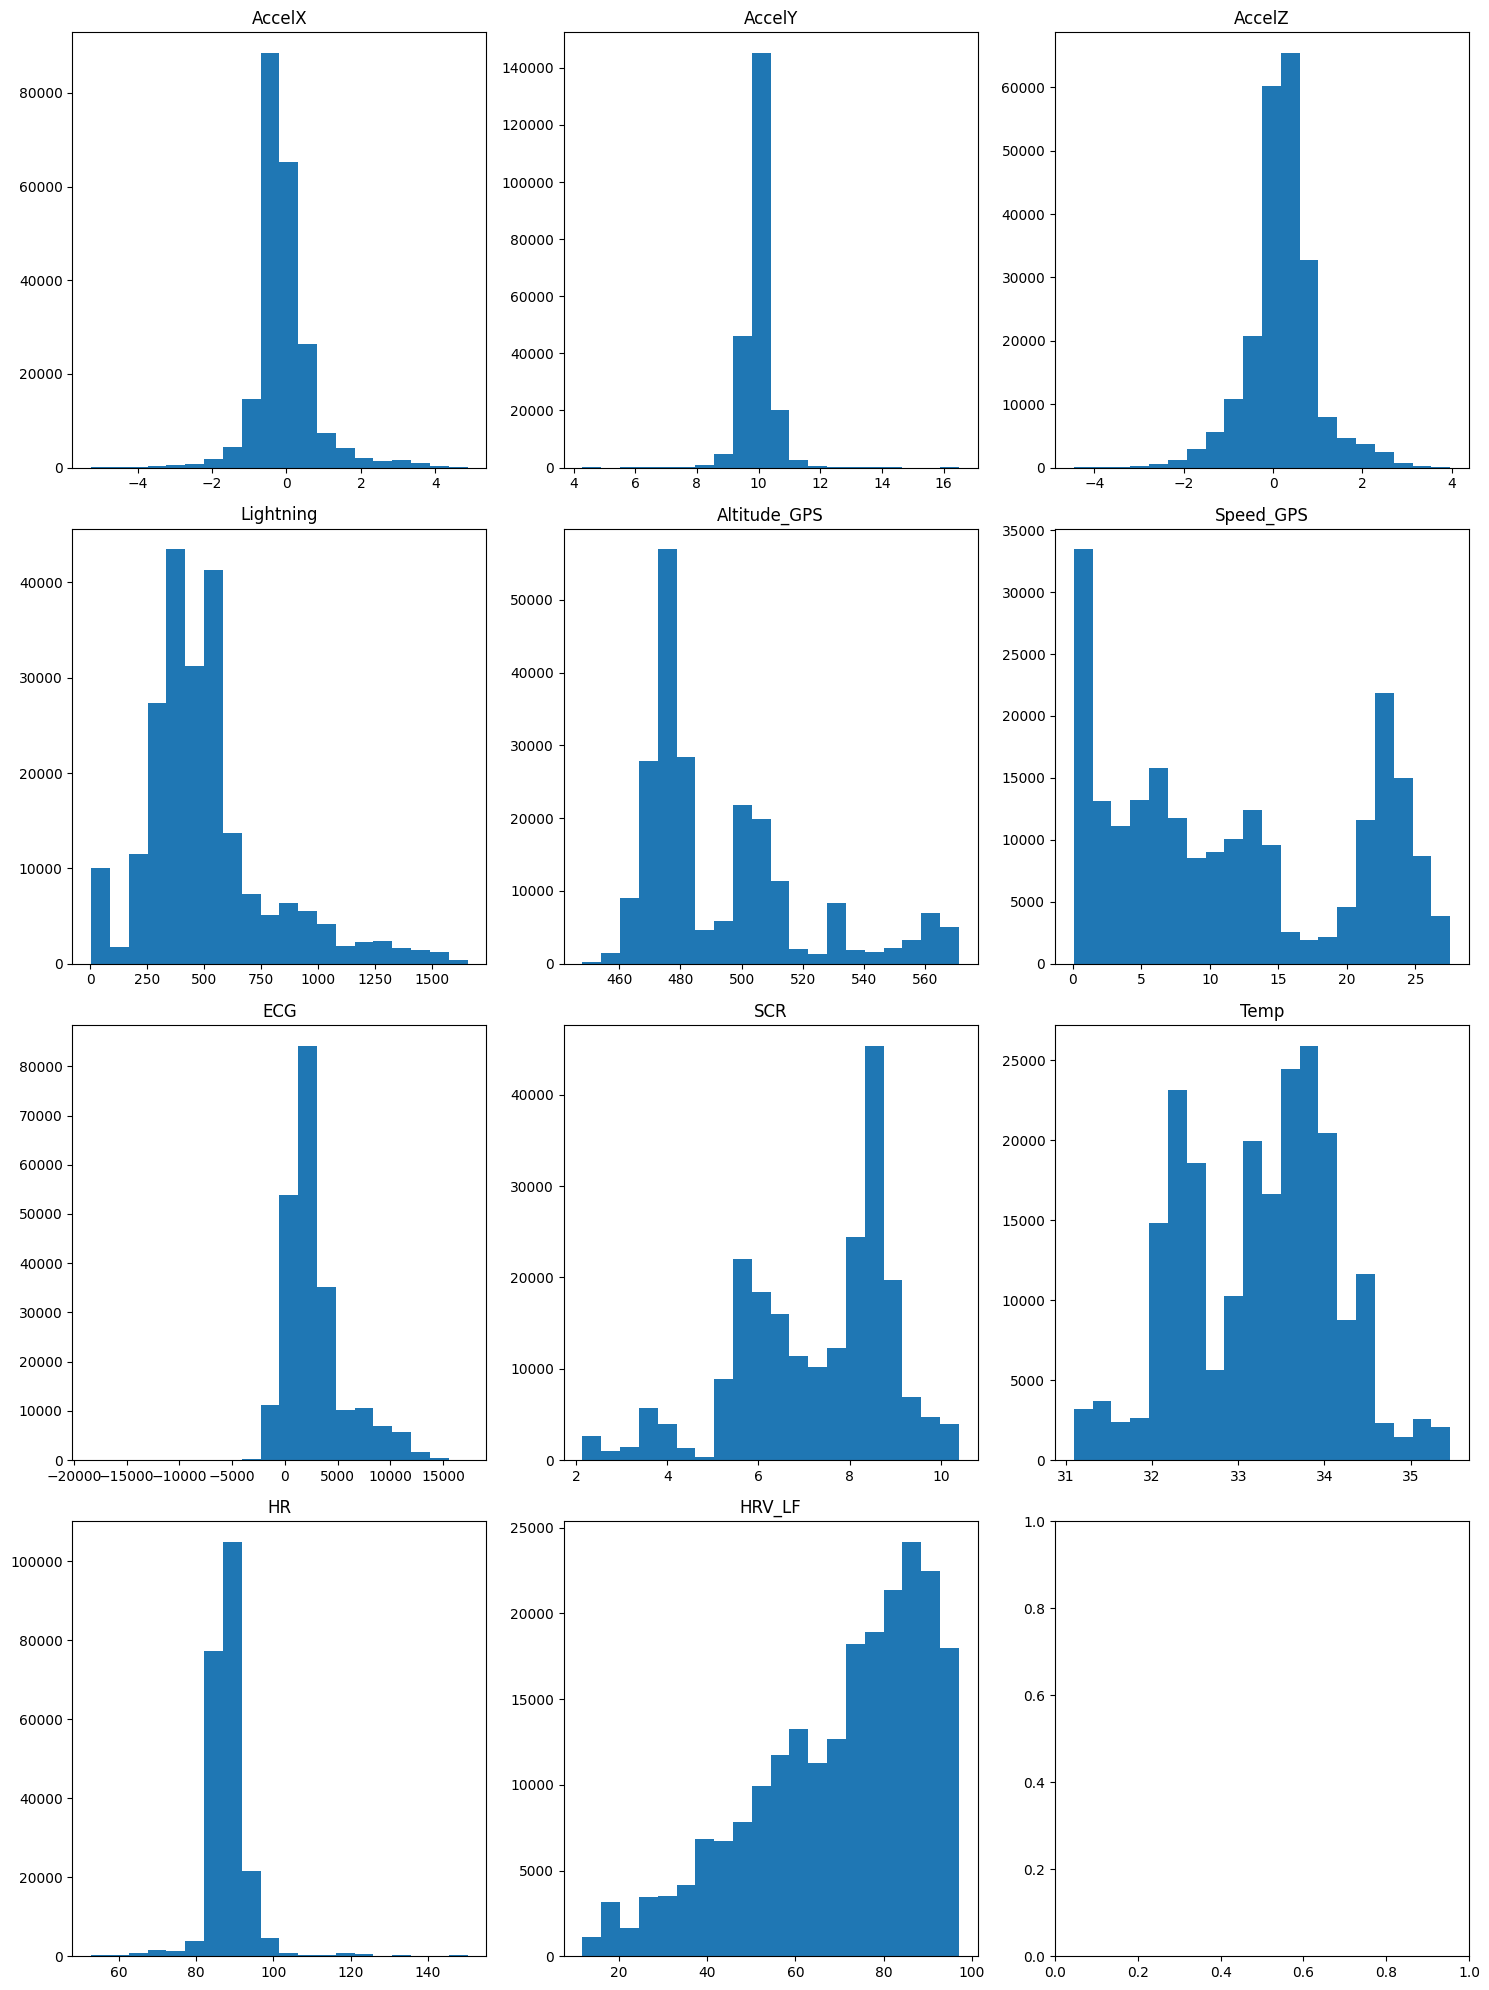

In [183]:
import matplotlib.pyplot as plt

# Define the columns
columns = ['AccelX', 'AccelY', 'AccelZ', 'Lightning', 'Altitude_GPS', 'Speed_GPS', 'ECG', 'SCR', 'Temp', 'HR', 'HRV_LF']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

# Iterate over the columns and plot the distribution
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    axes[row, col].hist(data[column], bins=20)
    axes[row, col].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

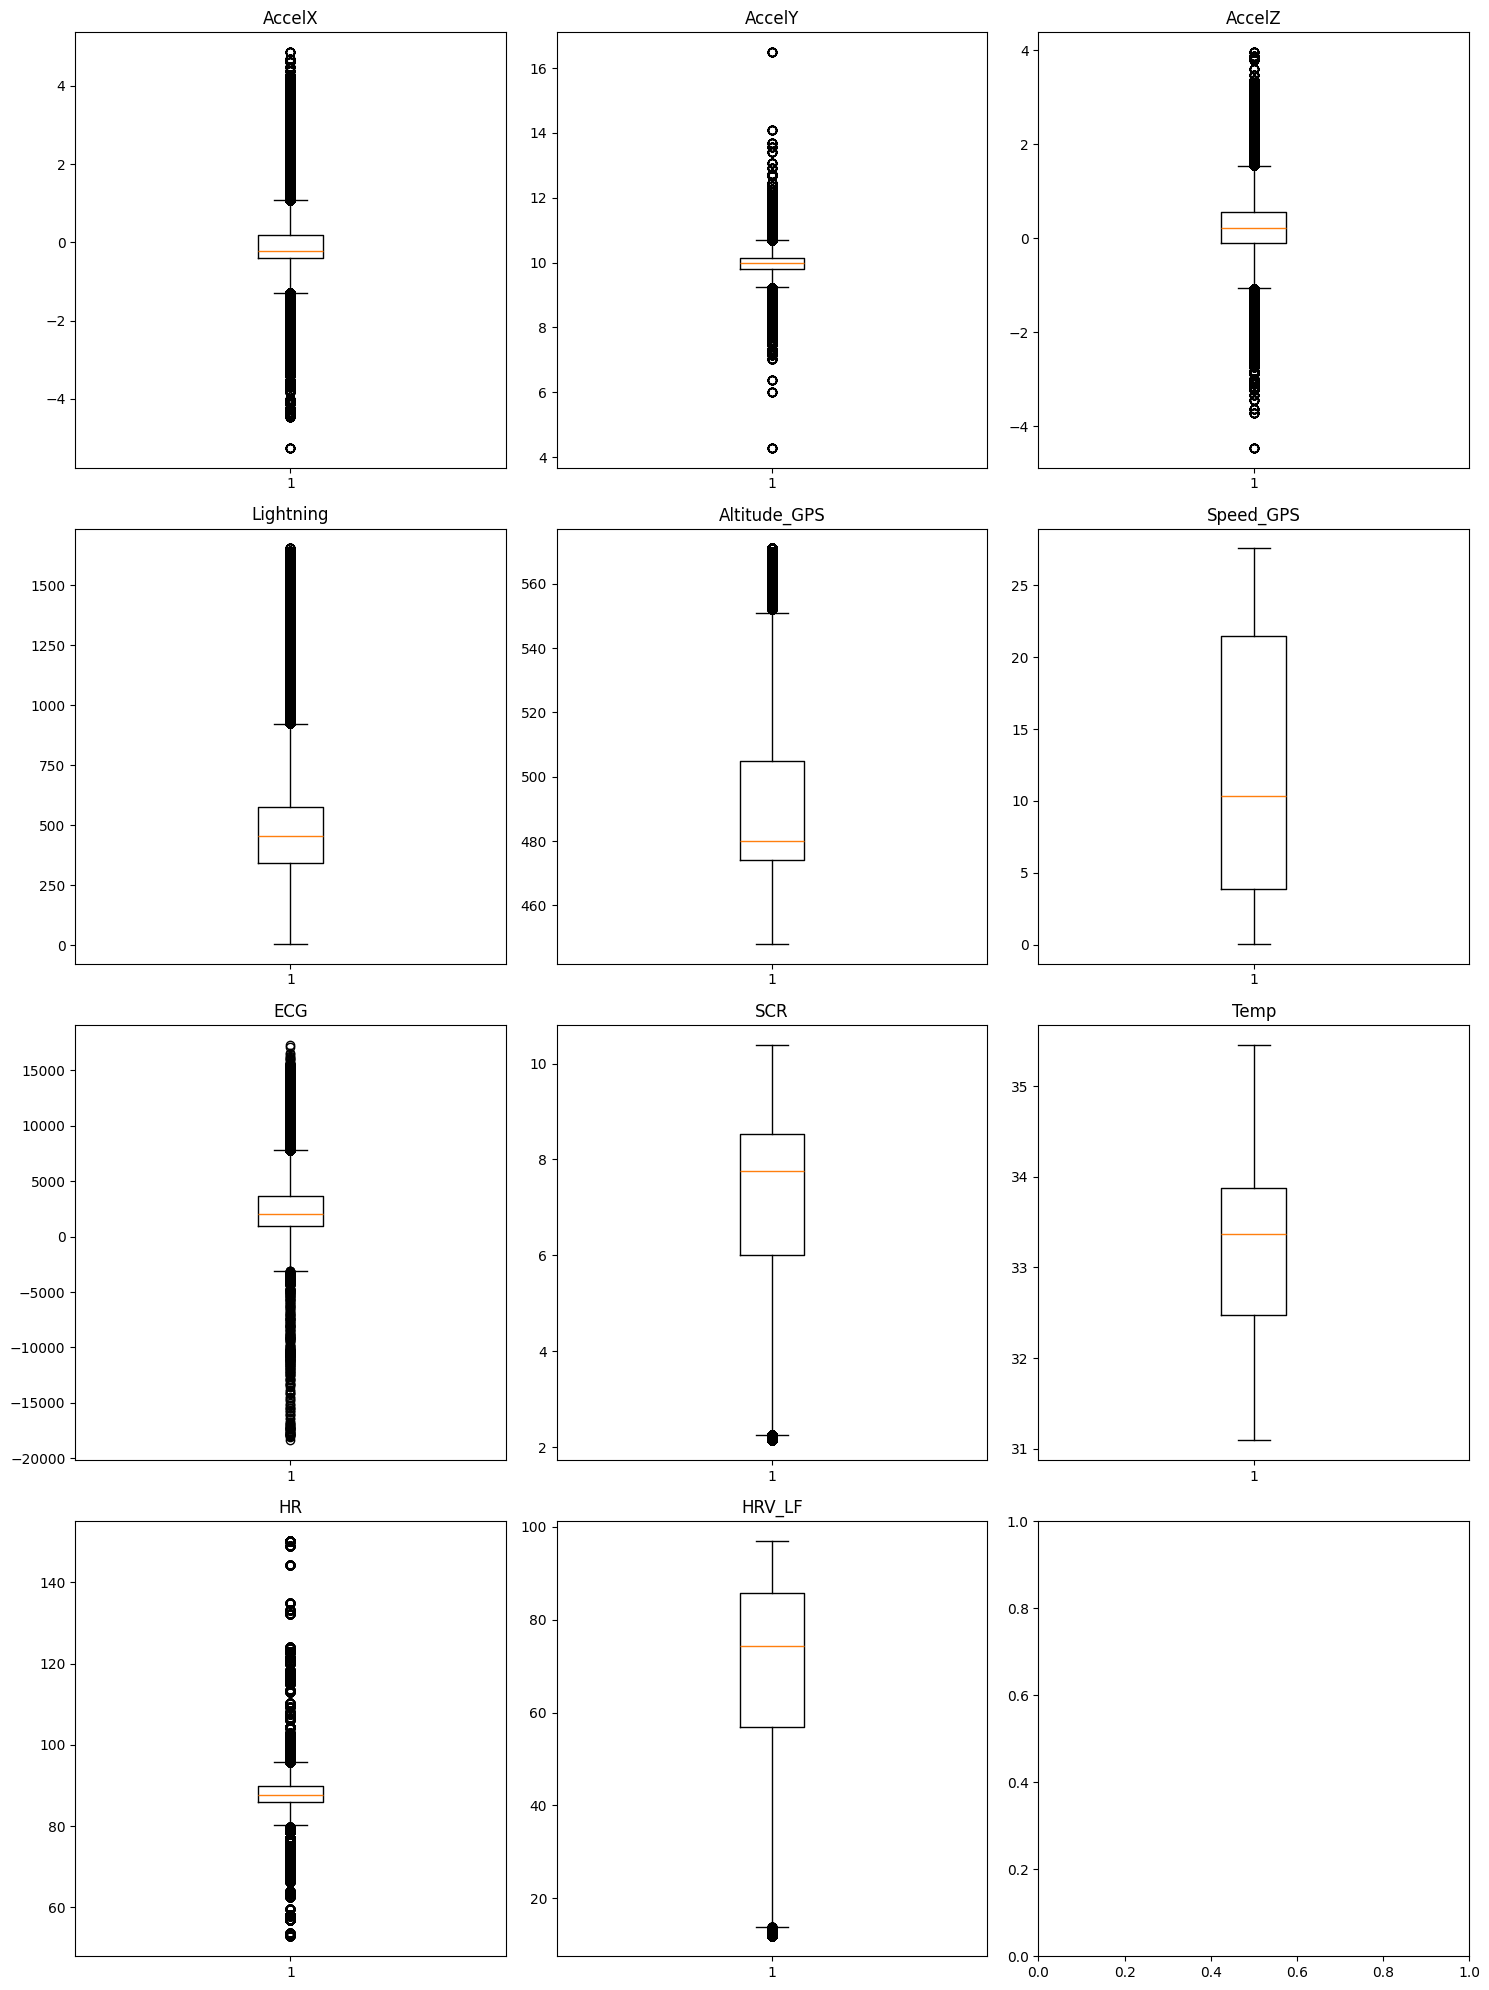

In [184]:
# Create boxplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

# Iterate over the columns and plot the distribution
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    axes[row, col].boxplot(data[column])
    axes[row, col].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

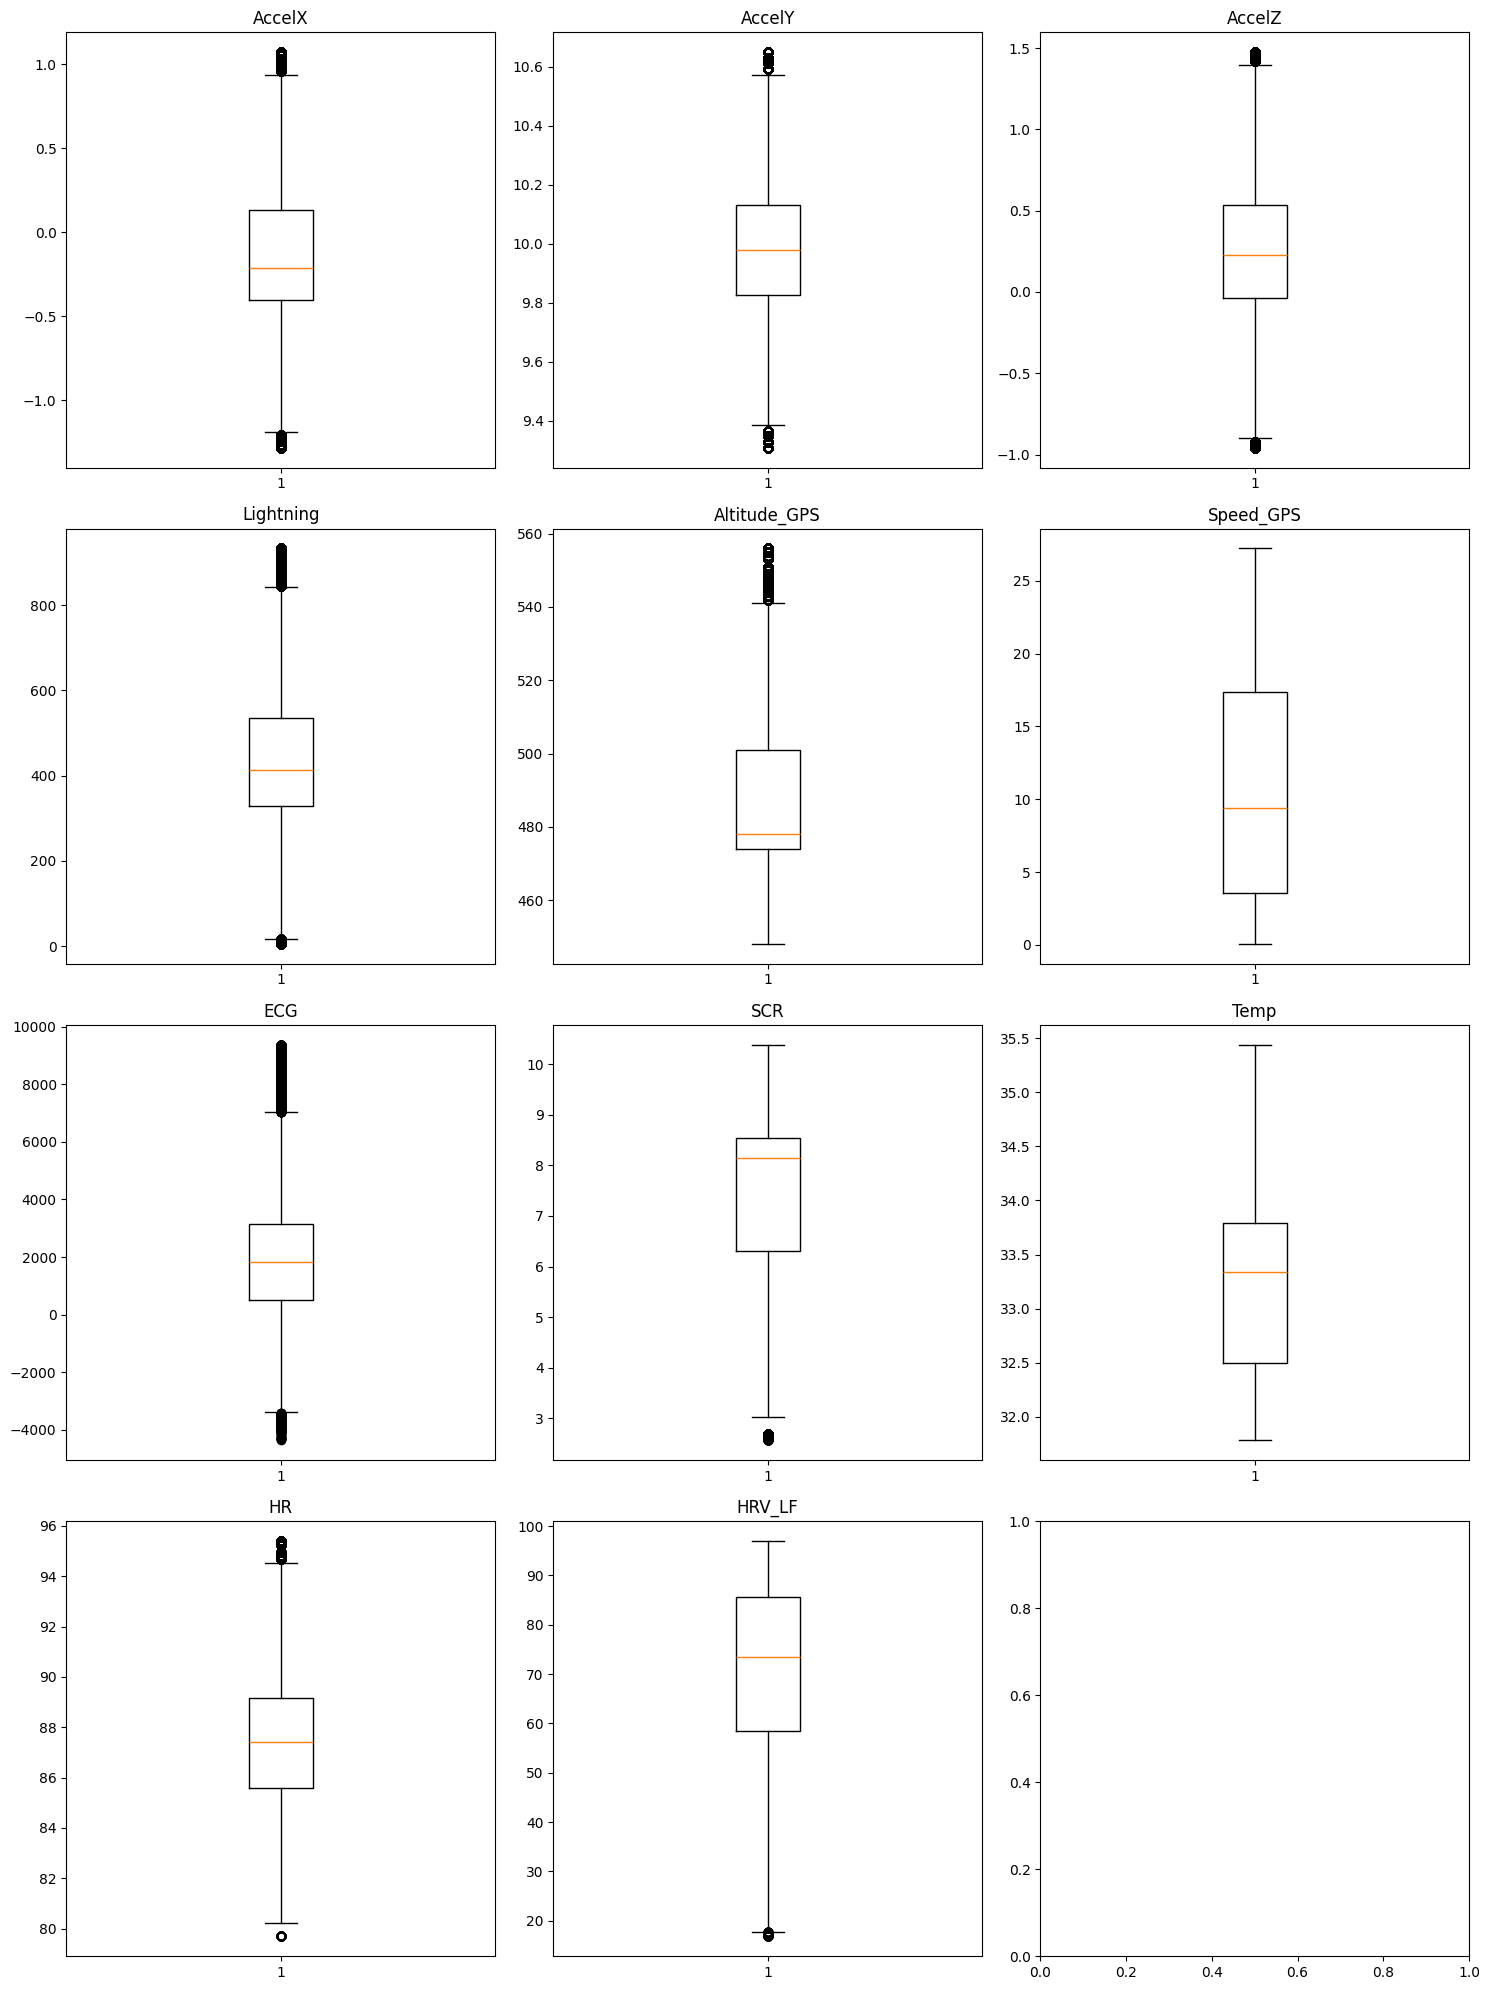

In [185]:
# remove the ouliers from the data using box plots and IQR method 
# for each column
for column in columns:
    # Calculate Q1, Q2 and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter out the outliers
    data = data[(data[column] >= Q1 - 1.5*IQR) & (data[column] <= Q3 + 1.5*IQR)]

# Create boxplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

# Iterate over the columns and plot the distribution
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    axes[row, col].boxplot(data[column])
    axes[row, col].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



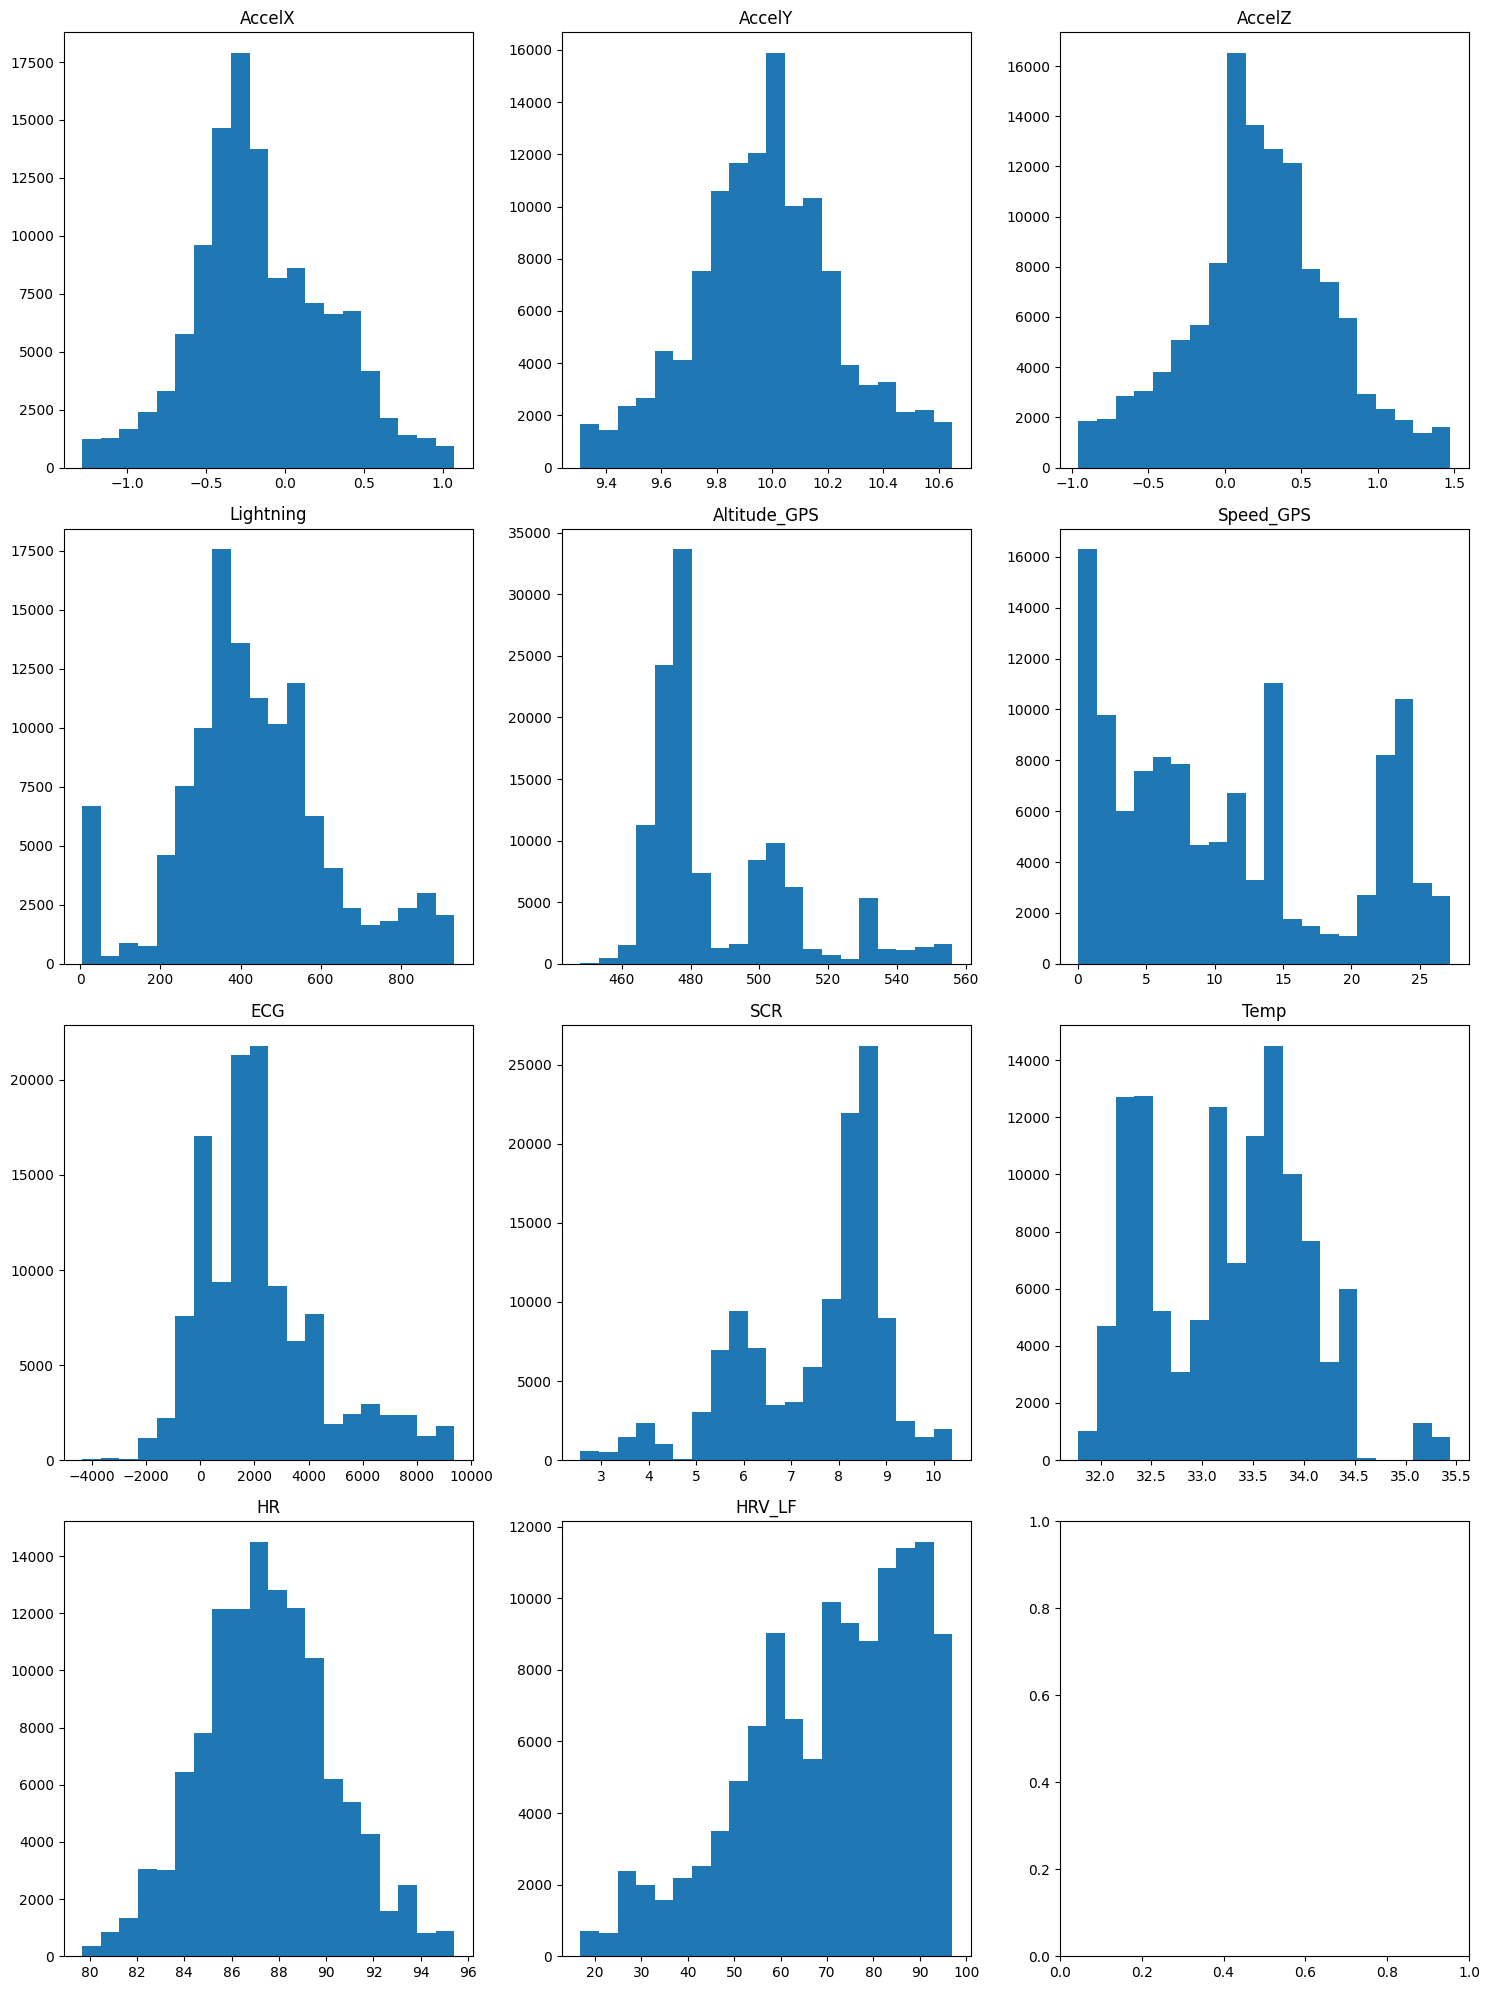

In [186]:
import matplotlib.pyplot as plt

# Define the columns
columns = ['AccelX', 'AccelY', 'AccelZ', 'Lightning', 'Altitude_GPS', 'Speed_GPS', 'ECG', 'SCR', 'Temp', 'HR', 'HRV_LF']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

# Iterate over the columns and plot the distribution
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    axes[row, col].hist(data[column], bins=20)
    axes[row, col].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [187]:
data['target'].value_counts()

target
50.0     63330
30.0     24469
100.0    22482
70.0      8520
Name: count, dtype: int64

In [188]:
data.columns

Index(['Time_Biotrace', 'AccelX', 'AccelY', 'AccelZ', 'Lightning',
       'Latitude_GPS', 'Longitude_GPS', 'Accuracy_GPS', 'Altitude_GPS',
       'Speed_GPS', 'Bearing_GPS', 'ECG', 'SCR', 'Temp', 'HR', 'HRV_LF',
       'target'],
      dtype='object')

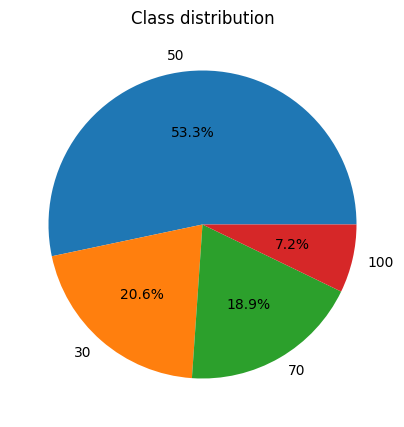

In [189]:
# pie chart distribution of target variable
plt.figure(figsize=(5,5))
plt.pie(data['target'].value_counts(),labels=['50','30','70','100'],autopct='%1.1f%%')
plt.title('Class distribution')
plt.show()

In [190]:
#percentage of missing values in each column
data.isnull().sum()/len(data)*100

Time_Biotrace    0.0
AccelX           0.0
AccelY           0.0
AccelZ           0.0
Lightning        0.0
Latitude_GPS     0.0
Longitude_GPS    0.0
Accuracy_GPS     0.0
Altitude_GPS     0.0
Speed_GPS        0.0
Bearing_GPS      0.0
ECG              0.0
SCR              0.0
Temp             0.0
HR               0.0
HRV_LF           0.0
target           0.0
dtype: float64

In [191]:
#drop null values
data = data.dropna()
data.isnull().sum()/len(data)*100

Time_Biotrace    0.0
AccelX           0.0
AccelY           0.0
AccelZ           0.0
Lightning        0.0
Latitude_GPS     0.0
Longitude_GPS    0.0
Accuracy_GPS     0.0
Altitude_GPS     0.0
Speed_GPS        0.0
Bearing_GPS      0.0
ECG              0.0
SCR              0.0
Temp             0.0
HR               0.0
HRV_LF           0.0
target           0.0
dtype: float64

In [192]:
# reindexing the data
data = data.reset_index(drop=True)
data

,Time_Biotrace,AccelX,AccelY,AccelZ,Lightning,Latitude_GPS,Longitude_GPS,Accuracy_GPS,Altitude_GPS,Speed_GPS,Bearing_GPS,ECG,SCR,Temp,HR,HRV_LF,target
0,14:00:00:000,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,102.142,5.451,32.053,90.491,62.093,100.0
1,14:00:00:007,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,113.551,5.451,32.053,90.491,62.093,100.0
2,14:00:00:015,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,134.597,5.452,32.052,90.491,62.093,100.0
3,14:00:00:023,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,140.876,5.452,32.054,90.491,62.093,100.0
4,14:00:00:031,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,136.649,5.453,32.053,90.491,62.093,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118796,14:59:59:960,-0.095768,9.672575,0.746991,633.70715,48.714412,9.089996,10,547,24.024784,113.29089,66.340,5.448,32.053,90.491,61.583,100.0
118797,14:59:59:968,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,85.627,5.449,32.053,90.491,61.583,100.0
118798,14:59:59:976,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,95.167,5.449,32.053,90.491,61.583,100.0
118799,14:59:59:984,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,79.471,5.449,32.050,90.491,61.583,100.0


### Balancing the percentage of classes in the target variable

In [193]:
# Assuming 'target' is your class column and df is your DataFrame
min_class_size = data['target'].value_counts().min()

balanced_df = data.groupby('target').apply(lambda x: x.sample(min_class_size)).reset_index(drop=True)

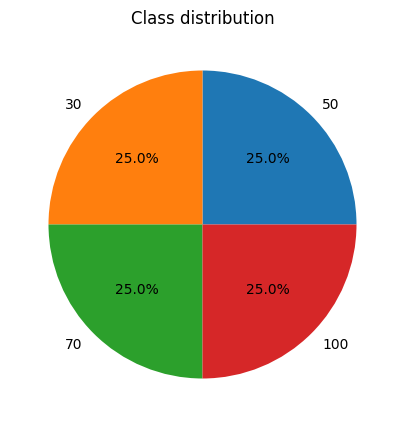

In [194]:
# pie chart distribution of target variable
plt.figure(figsize=(5,5))
plt.pie(balanced_df['target'].value_counts(),labels=['50','30','70','100'],autopct='%1.1f%%')
plt.title('Class distribution')
plt.show()

### Correlation Matrix

In [195]:
balanced_df = balanced_df[['AccelX', 'AccelY', 'AccelZ', 'Lightning', 'Speed_GPS', 'Bearing_GPS', 'ECG', 'SCR', 'Temp', 'HR', 'HRV_LF',
       'target']]

In [196]:
balanced_df.columns

Index(['AccelX', 'AccelY', 'AccelZ', 'Lightning', 'Speed_GPS', 'Bearing_GPS',
       'ECG', 'SCR', 'Temp', 'HR', 'HRV_LF', 'target'],
      dtype='object')

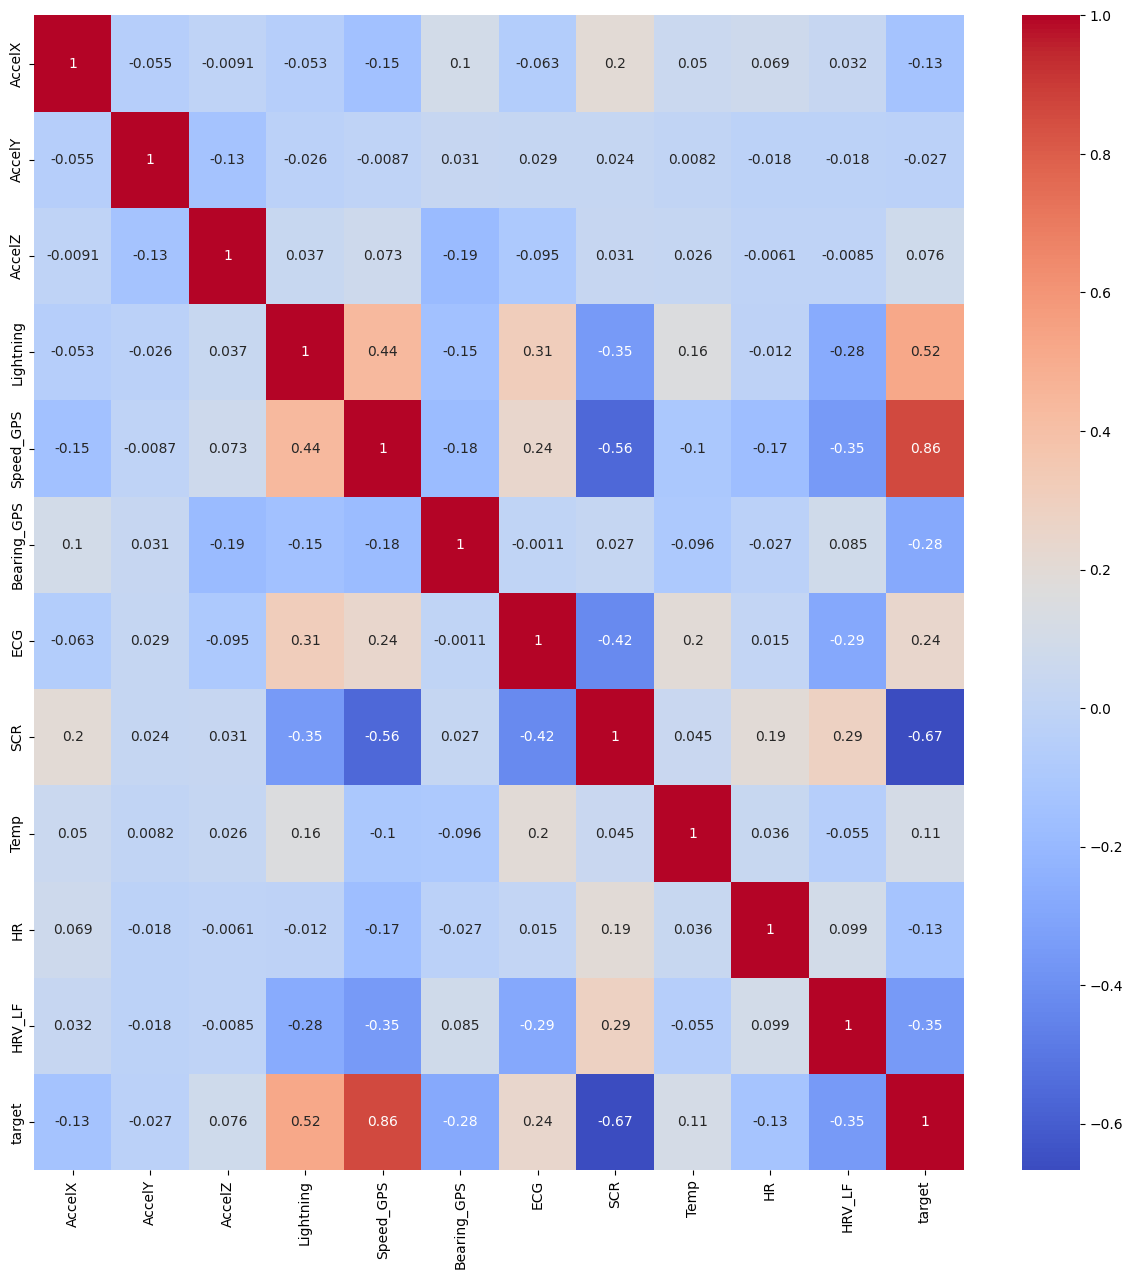

In [197]:
# correlation matrix of data 
import seaborn as sns
corr = balanced_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

### Dimensionality Reduction - dropping correlated columns

In [198]:
balanced_df = balanced_df.drop(['Lightning','ECG'],axis=1)

In [199]:
balanced_df['Total_Accel'] = np.sqrt(balanced_df['AccelX']**2 + balanced_df['AccelY']**2 + balanced_df['AccelZ']**2)
#drop
balanced_df = balanced_df.drop(['AccelX','AccelY','AccelZ'],axis=1)

In [200]:
#rearrange columns
balanced_df = balanced_df[['Total_Accel', 'Speed_GPS', 'Bearing_GPS', 'SCR', 'Temp', 'HR', 'HRV_LF', 'target']]

In [201]:
features = balanced_df.columns.values
#delete the target string from features
features = np.delete(features,7)
features

array(['Total_Accel', 'Speed_GPS', 'Bearing_GPS', 'SCR', 'Temp', 'HR',
       'HRV_LF'], dtype=object)

[0.00381642 0.32980105 0.20705018 0.21210744 0.22543088 0.02179403]


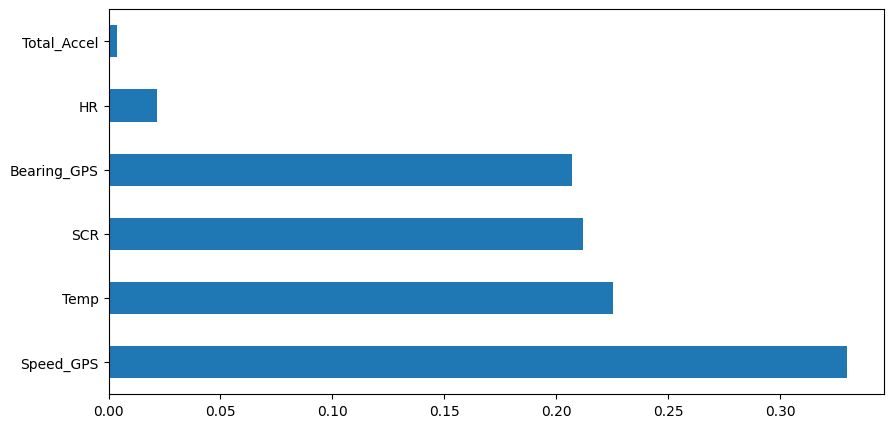

In [202]:
#feature importance plot
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(balanced_df[features[:-1]],balanced_df['target'])
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=(10,5))
feat_importances = pd.Series(model.feature_importances_, index=balanced_df[features[:-1]].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Training the data

In [203]:
# training and testing data split 
from sklearn.model_selection import train_test_split

X = balanced_df.drop(['target'],axis=1)
y = balanced_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [204]:
balanced_df

,Total_Accel,Speed_GPS,Bearing_GPS,SCR,Temp,HR,HRV_LF,target
0,10.252999,4.317944,243.858690,8.760,32.182,89.437,94.059,30.0
1,10.258436,3.995663,249.911030,9.158,32.535,88.535,70.557,30.0
2,10.189758,4.317944,243.858690,8.740,32.166,89.698,93.751,30.0
3,9.923587,2.402698,227.884380,8.769,32.310,82.808,90.105,30.0
4,10.156582,7.333671,269.993560,9.089,32.711,85.102,81.775,30.0
...,...,...,...,...,...,...,...,...
34075,9.963377,24.078861,110.468740,5.862,32.955,86.176,48.373,100.0
34076,9.575945,22.589184,235.888380,5.521,32.033,89.437,90.216,100.0
34077,10.163857,24.131586,106.189476,5.613,33.125,83.139,62.576,100.0
34078,10.427678,22.758432,104.186520,5.962,33.498,86.785,56.579,100.0


### Scaling the data

In [205]:
# scaling the data using standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Naive Bayes

In [206]:
# naive bayes classifier model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix

nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
print('Accuracy score: ',accuracy_score(y_test,y_pred_nb))
print('Confusion matrix: \n',confusion_matrix(y_test,y_pred_nb))

Accuracy score:  0.8857100938967136
Confusion matrix: 
 [[1554  117    9   24]
 [ 112 1580   12    0]
 [   0  312 1312   80]
 [   0   10  103 1591]]


## Linear Discriminant Analysis

In [207]:
# linear discriminant analysis classifier model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
y_pred_lda = lda.predict(X_test)
print('Accuracy score: ',accuracy_score(y_test,y_pred_lda))
print('Confusion matrix: \n',confusion_matrix(y_test,y_pred_lda))

Accuracy score:  0.891725352112676
Confusion matrix: 
 [[1579   92   14   19]
 [ 326 1345   33    0]
 [   0  178 1523    3]
 [   0   10   63 1631]]


## Logistic Regression

In [208]:
# logistic regression model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred_lr = log_reg.predict(X_test)
print('Accuracy score: ',accuracy_score(y_test,y_pred_lr))
print('Confusion matrix: \n',confusion_matrix(y_test,y_pred_lr))

Accuracy score:  0.951731220657277
Confusion matrix: 
 [[1583   88    9   24]
 [  44 1618   42    0]
 [   0   83 1615    6]
 [   0   10   23 1671]]


## K Nearest Neighbour 

In [209]:
# knn classifier model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print('Accuracy score: ',accuracy_score(y_test,y_pred_knn))
print('Confusion matrix: \n',confusion_matrix(y_test,y_pred_knn))

Accuracy score:  0.9976525821596244
Confusion matrix: 
 [[1699    2    2    1]
 [   6 1696    1    1]
 [   0    0 1704    0]
 [   0    0    3 1701]]


## Support Vector Machine

In [210]:
# ebf kernel svm classifier model
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred_svm = svc.predict(X_test)
print('Accuracy score: ',accuracy_score(y_test,y_pred_svm))
print('Confusion matrix: \n',confusion_matrix(y_test,y_pred_svm))

Accuracy score:  0.9878227699530516
Confusion matrix: 
 [[1646   25    9   24]
 [   6 1696    2    0]
 [   0    0 1704    0]
 [   0   10    7 1687]]


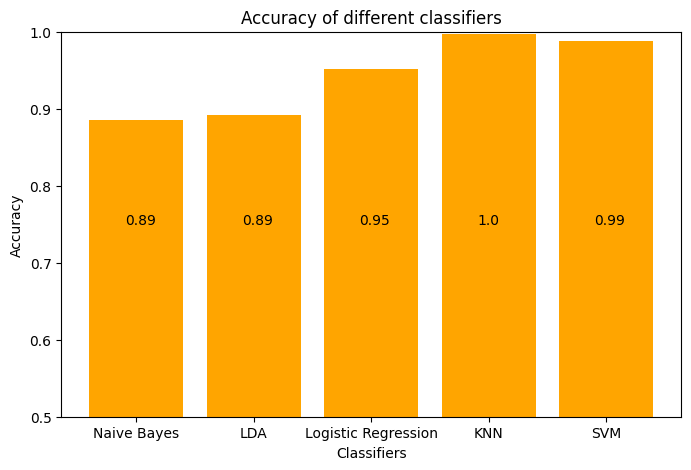

In [211]:
#plot accuracy of different classifiers and add score on top of bars
plt.figure(figsize=(8,5))
plt.bar(['Naive Bayes','LDA','Logistic Regression','KNN','SVM'],[accuracy_score(y_test,y_pred_nb),accuracy_score(y_test,y_pred_lda),accuracy_score(y_test,y_pred_lr),accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_svm)],color='orange')
plt.title('Accuracy of different classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.ylim(0.5,1)
plt.text(-0.1,0.75,round(accuracy_score(y_test,y_pred_nb),2))
plt.text(0.9,0.75,round(accuracy_score(y_test,y_pred_lda),2))
plt.text(1.9,0.75,round(accuracy_score(y_test,y_pred_lr),2))
plt.text(2.9,0.75,round(accuracy_score(y_test,y_pred_knn),2))
plt.text(3.9,0.75,round(accuracy_score(y_test,y_pred_svm),2))
plt.show()


In [212]:
#save balanced_df to csv
balanced_df.to_csv('balanced_df.csv',index=False)

### Confusion Matrix 

C:\Users\ashha\AppData\Local\Temp\ipykernel_18368\3033566929.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(['50','30','70','100'])
C:\Users\ashha\AppData\Local\Temp\ipykernel_18368\3033566929.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_yticklabels(['50','30','70','100'])
C:\Users\ashha\AppData\Local\Temp\ipykernel_18368\3033566929.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(['50','30','70','100'])
C:\Users\ashha\AppData\Local\Temp\ipykernel_18368\3033566929.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_yticklabels(['50','30','70','100'])
C:\Users

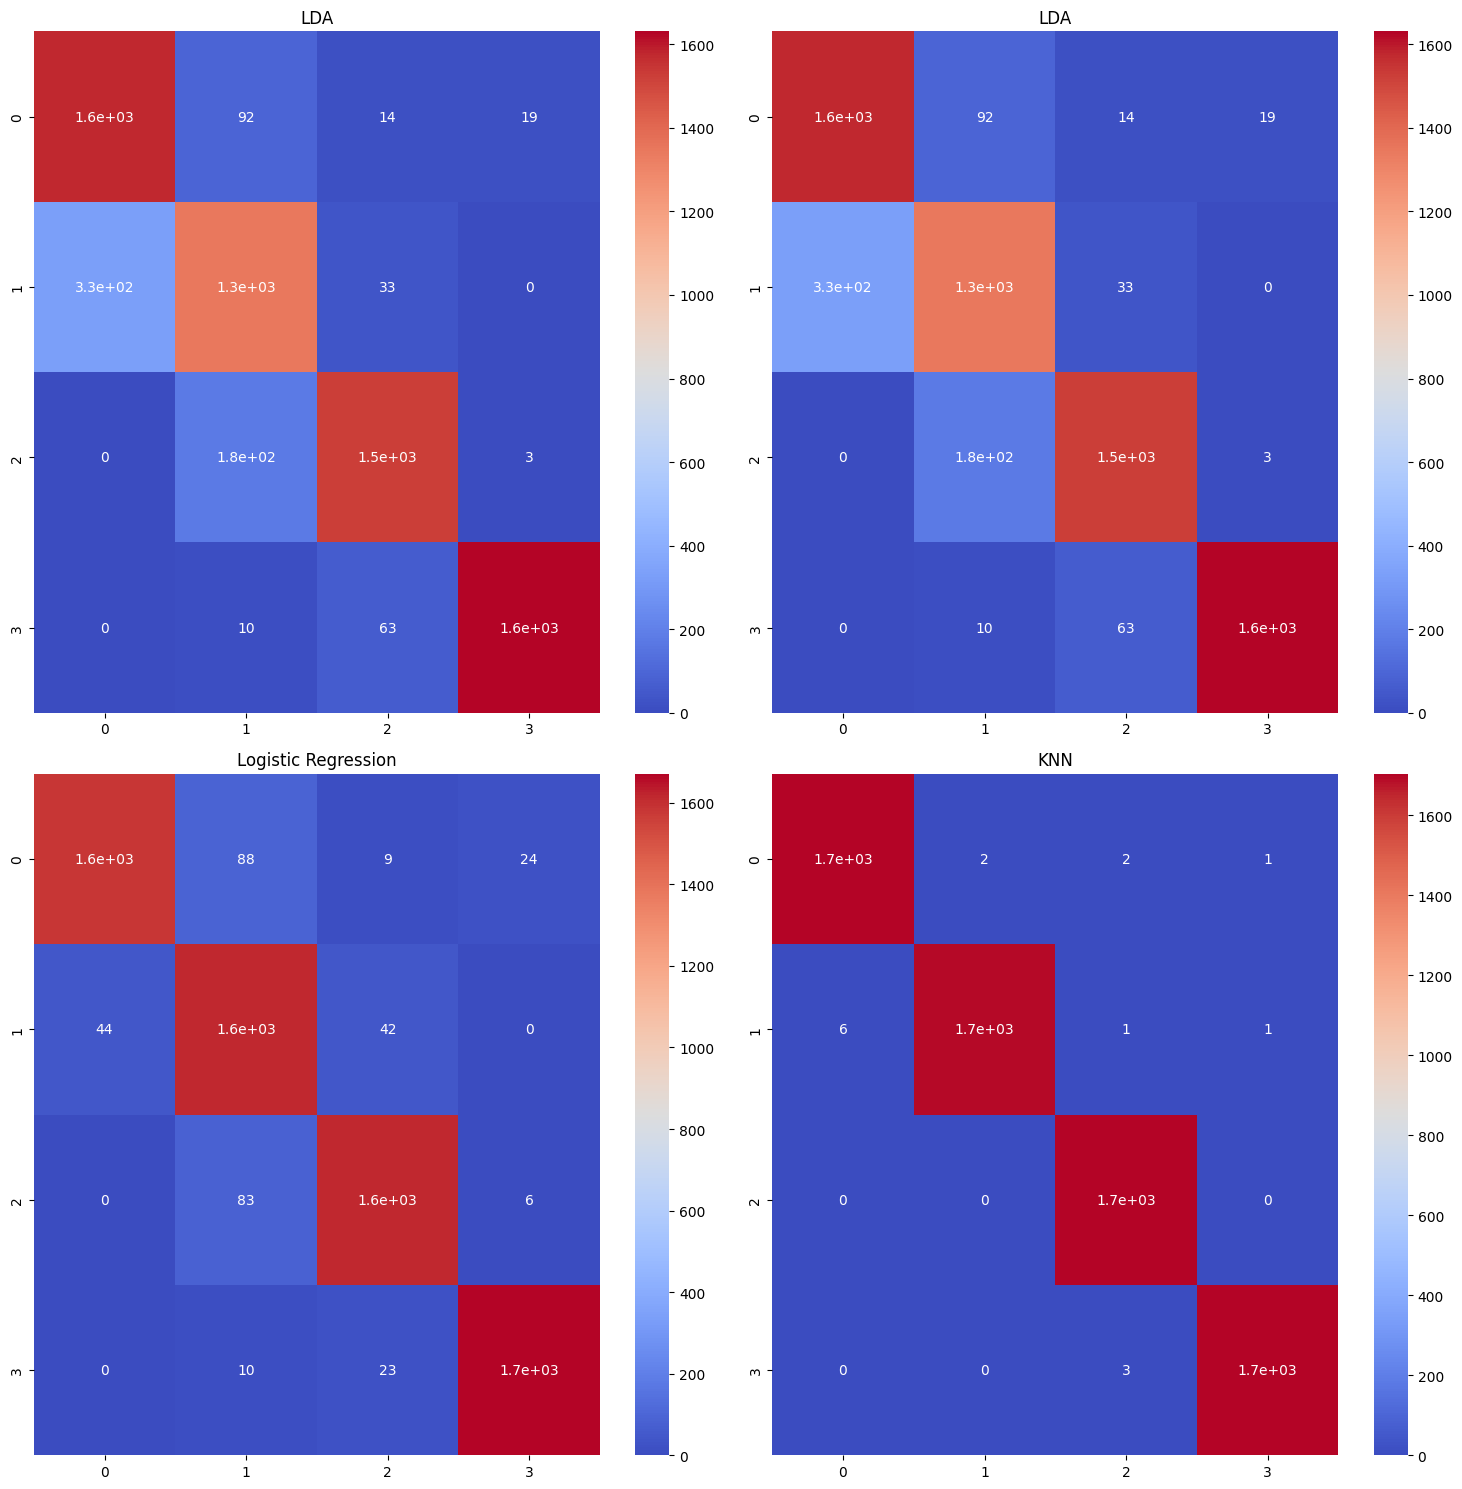

In [213]:
#confusion matrix plot for all classifiers in subplots by seaborn 
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Iterate over the columns and plot the distribution
axes[0,0].set_title('LDA')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')
axes[0,0].set_xticklabels(['50','30','70','100'])
axes[0,0].set_yticklabels(['50','30','70','100'])
axes[0,0].set_ylim(3.5,-0.5)
axes[0,0].set_xlim(-0.5,3.5)
sns.heatmap(confusion_matrix(y_test,y_pred_lda),annot=True,cmap='coolwarm',ax=axes[0,0])

axes[0,1].set_title('LDA')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')
axes[0,1].set_xticklabels(['50','30','70','100'])
axes[0,1].set_yticklabels(['50','30','70','100'])
axes[0,1].set_ylim(3.5,-0.5)
axes[0,1].set_xlim(-0.5,3.5)
sns.heatmap(confusion_matrix(y_test,y_pred_lda),annot=True,cmap='coolwarm',ax=axes[0,1])

axes[1,0].set_title('Logistic Regression')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')
axes[1,0].set_xticklabels(['50','30','70','100'])
axes[1,0].set_yticklabels(['50','30','70','100'])
axes[1,0].set_ylim(3.5,-0.5)
axes[1,0].set_xlim(-0.5,3.5)
sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True,cmap='coolwarm',ax=axes[1,0])

axes[1,1].set_title('KNN')
axes[1,1].set_xlabel('Predicted')
axes[1,1].set_ylabel('Actual')
axes[1,1].set_xticklabels(['50','30','70','100'])
axes[1,1].set_yticklabels(['50','30','70','100'])
axes[1,1].set_ylim(3.5,-0.5)
axes[1,1].set_xlim(-0.5,3.5)
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True,cmap='coolwarm',ax=axes[1,1])

plt.tight_layout()
plt.show()

# Data Visualisation

## Point Map

In [43]:
colors_dict = {30.0: 'red', 50.0: 'blue', 70.0: 'green', 100.0: 'orange'}
m2 = folium.Map(location=[data['Latitude_GPS'].mean(), data['Longitude_GPS'].mean()], zoom_start=12)
for i in tqdm(range(0, len(data)-1)):
    temp = data.iloc[i]['target']
    color = colors_dict[temp]
    folium.CircleMarker([data.iloc[i]['Latitude_GPS'], data.iloc[i]['Longitude_GPS']], radius=1, color=color).add_to(m2)
#save map
m2.save('map_labelled_data.html')

100%|██████████| 118800/118800 [00:13<00:00, 8949.73it/s]


In [44]:
import folium
from folium.plugins import HeatMap

# Create a base map centered at the mean of your coordinates
m = folium.Map(location=[data['Latitude_GPS'].mean(), data['Longitude_GPS'].mean()], zoom_start=12)

# Convert your data to a list of points
heat_data = [[point['Latitude_GPS'], point['Longitude_GPS'], point['Temp']] for index, point in data.iterrows()]

# Add the HeatMap layer
HeatMap(heat_data).add_to(m)

# Save or display the map
# m.save('heart_rate_heatmap.html')  # Save as an HTML file

### PCA for transforming features

In [214]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(data[['HR', 'SCR', 'ECG', 'Temp', 'HRV_LF']]), columns=data[['HR', 'SCR', 'ECG', 'Temp', 'HRV_LF']].columns)

In [215]:
from sklearn.decomposition import PCA

# Assuming df_normalized is your normalized DataFrame
pca = PCA(n_components=1)  # You can choose the number of components based on your needs
df_pca = pd.DataFrame(pca.fit_transform(df_normalized), columns=['PCA_WorkloadIndex'])

In [216]:
# putting df_pca column in data
data['PCA_WorkloadIndex'] = df_pca['PCA_WorkloadIndex']
data

,Time_Biotrace,AccelX,AccelY,AccelZ,Lightning,Latitude_GPS,Longitude_GPS,Accuracy_GPS,Altitude_GPS,Speed_GPS,Bearing_GPS,ECG,SCR,Temp,HR,HRV_LF,target,PCA_WorkloadIndex
0,14:00:00:000,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,102.142,5.451,32.053,90.491,62.093,100.0,-0.004371
1,14:00:00:007,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,113.551,5.451,32.053,90.491,62.093,100.0,-0.004000
2,14:00:00:015,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,134.597,5.452,32.052,90.491,62.093,100.0,-0.003484
3,14:00:00:023,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,140.876,5.452,32.054,90.491,62.093,100.0,-0.003068
4,14:00:00:031,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,136.649,5.453,32.053,90.491,62.093,100.0,-0.003374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118796,14:59:59:960,-0.095768,9.672575,0.746991,633.70715,48.714412,9.089996,10,547,24.024784,113.29089,66.340,5.448,32.053,90.491,61.583,100.0,-0.001283
118797,14:59:59:968,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,85.627,5.449,32.053,90.491,61.583,100.0,-0.000718
118798,14:59:59:976,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,95.167,5.449,32.053,90.491,61.583,100.0,-0.000408
118799,14:59:59:984,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,79.471,5.449,32.050,90.491,61.583,100.0,-0.001237


In [217]:
#drop null values
data = data.dropna()
data.isnull().sum()/len(data)*100

Time_Biotrace        0.0
AccelX               0.0
AccelY               0.0
AccelZ               0.0
Lightning            0.0
Latitude_GPS         0.0
Longitude_GPS        0.0
Accuracy_GPS         0.0
Altitude_GPS         0.0
Speed_GPS            0.0
Bearing_GPS          0.0
ECG                  0.0
SCR                  0.0
Temp                 0.0
HR                   0.0
HRV_LF               0.0
target               0.0
PCA_WorkloadIndex    0.0
dtype: float64

In [218]:
data

,Time_Biotrace,AccelX,AccelY,AccelZ,Lightning,Latitude_GPS,Longitude_GPS,Accuracy_GPS,Altitude_GPS,Speed_GPS,Bearing_GPS,ECG,SCR,Temp,HR,HRV_LF,target,PCA_WorkloadIndex
0,14:00:00:000,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,102.142,5.451,32.053,90.491,62.093,100.0,-0.004371
1,14:00:00:007,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,113.551,5.451,32.053,90.491,62.093,100.0,-0.004000
2,14:00:00:015,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,134.597,5.452,32.052,90.491,62.093,100.0,-0.003484
3,14:00:00:023,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,140.876,5.452,32.054,90.491,62.093,100.0,-0.003068
4,14:00:00:031,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,136.649,5.453,32.053,90.491,62.093,100.0,-0.003374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118796,14:59:59:960,-0.095768,9.672575,0.746991,633.70715,48.714412,9.089996,10,547,24.024784,113.29089,66.340,5.448,32.053,90.491,61.583,100.0,-0.001283
118797,14:59:59:968,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,85.627,5.449,32.053,90.491,61.583,100.0,-0.000718
118798,14:59:59:976,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,95.167,5.449,32.053,90.491,61.583,100.0,-0.000408
118799,14:59:59:984,-0.095768,9.672575,0.746991,628.72314,48.714412,9.089996,10,547,24.024784,113.29089,79.471,5.449,32.050,90.491,61.583,100.0,-0.001237


In [50]:
import folium
from folium.plugins import HeatMap

# Create a base map centered at the mean of your coordinates
m = folium.Map(location=[data['Latitude_GPS'].mean(), data['Longitude_GPS'].mean()], zoom_start=12)

# Convert your data to a list of points
heat_data = [[point['Latitude_GPS'], point['Longitude_GPS'], point['PCA_WorkloadIndex']] for index, point in data.iterrows()]

# Add the HeatMap layer
HeatMap(heat_data).add_to(m)

# Save or display the map
m.save('workload_heatmap.html')  # Save as an HTML file



# Prediction of Unlabeled data

In [219]:
# importing unlabelled data
data_unlalabelled_1 = pd.read_csv('participant_1.csv',sep=';')
data_unlalabelled_2 = pd.read_csv('participant_5.csv',sep=';')
data_unlalabelled_3 = pd.read_csv('participant_7.csv',sep=';')
data_unlalabelled_4 = pd.read_csv('participant_9.csv',sep=';')


data_unlalabelled_1['Total_Accel'] = np.sqrt(data_unlalabelled_1['AccelX']**2 + data_unlalabelled_1['AccelY']**2 + data_unlalabelled_1['AccelZ']**2)
data_unlalabelled_2['Total_Accel'] = np.sqrt(data_unlalabelled_2['AccelX']**2 + data_unlalabelled_2['AccelY']**2 + data_unlalabelled_2['AccelZ']**2)
data_unlalabelled_3['Total_Accel'] = np.sqrt(data_unlalabelled_3['AccelX']**2 + data_unlalabelled_3['AccelY']**2 + data_unlalabelled_3['AccelZ']**2)
data_unlalabelled_4['Total_Accel'] = np.sqrt(data_unlalabelled_4['AccelX']**2 + data_unlalabelled_4['AccelY']**2 + data_unlalabelled_4['AccelZ']**2)


In [220]:
data_unlalabelled_4.describe()

,AccelX,AccelY,AccelZ,Lightning,Latitude_GPS,Longitude_GPS,Accuracy_GPS,Altitude_GPS,Speed_GPS,Bearing_GPS,Frame_Videorating,Rating_Videorating,ECG,SCR,Temp,HR,HRV_LF,Total_Accel
count,219775.000000,219775.000000,219775.000000,219775.000000,219775.000000,219775.000000,219775.000000,219775.000000,219775.000000,219775.000000,219775.000000,219775.000000,219775.000000,219775.000000,219775.000000,219775.000000,219775.000000,219775.000000
mean,-0.187600,9.982099,0.320683,574.091639,48.727956,9.127664,10.408213,490.247180,13.928686,177.217669,23520.693696,229.773837,1988.716553,3.985424,35.153219,81.514194,63.199520,10.071344
std,0.920305,0.633266,0.895119,369.659272,0.012106,0.027517,6.456436,28.329739,8.507812,110.584007,14401.159322,137.648552,2006.264503,0.426422,0.516103,12.370654,24.222018,0.630542
min,-5.439626,5.592855,-4.003105,4.740102,48.704128,9.064315,5.000000,442.000000,0.091390,0.000000,0.000000,0.000000,-5870.382000,2.959000,33.895000,42.111000,1.298000,5.871575
25%,-0.593762,9.634268,-0.134075,306.480470,48.722516,9.108848,5.000000,472.000000,6.313608,94.296680,10871.000000,147.000000,592.574000,3.703000,34.787000,76.709000,43.921500,9.723586
50%,-0.287304,9.979033,0.344765,437.236570,48.728542,9.130774,10.000000,480.000000,13.395591,190.568220,23763.000000,211.000000,2003.529000,3.951000,35.237000,79.282000,66.048000,10.044788
75%,0.134075,10.323798,0.804452,739.193050,48.734631,9.150385,10.000000,504.000000,22.099106,270.841060,36655.000000,308.000000,3234.849500,4.257000,35.558000,82.697000,85.347500,10.415394
max,6.090849,14.116213,5.535394,2047.030200,48.747315,9.167479,45.000000,569.000000,28.271254,359.878100,47604.000000,1000.000000,10095.160000,5.786000,36.328000,181.852000,97.449000,14.640216


In [221]:
features

array(['Total_Accel', 'Speed_GPS', 'Bearing_GPS', 'SCR', 'Temp', 'HR',
       'HRV_LF'], dtype=object)

In [222]:
data_unlalabelled_1.columns

Index(['Time_Biotrace', 'Time_Videorating', 'Time_Light', 'Time_Accel',
       'Time_GPS', 'AccelX', 'AccelY', 'AccelZ', 'Lightning', 'Latitude_GPS',
       'Longitude_GPS', 'Accuracy_GPS', 'Altitude_GPS', 'Speed_GPS',
       'Bearing_GPS', 'Frame_Videorating', 'Rating_Videorating', 'ECG', 'SCR',
       'Temp', 'HR', 'HRV_LF', 'Total_Accel'],
      dtype='object')

In [223]:
df1 = data_unlalabelled_1[features]
df2 = data_unlalabelled_2[features]
df3 = data_unlalabelled_3[features]
df4 = data_unlalabelled_4[features]

#scale the data by scaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)
df2 = scaler.fit_transform(df2)
df3 = scaler.fit_transform(df3)
df4 = scaler.fit_transform(df4)


In [224]:
# predicting target values for unlabelled data using knn classifier
y_pred_unlabelled_1 = knn.predict(df1)
y_pred_unlabelled_2 = knn.predict(df2)
y_pred_unlabelled_3 = knn.predict(df3)
y_pred_unlabelled_4 = knn.predict(df4)

In [225]:
#add predicted target values to unlabelled data
data_unlalabelled_1['target'] = y_pred_unlabelled_1
data_unlalabelled_2['target'] = y_pred_unlabelled_2
data_unlalabelled_3['target'] = y_pred_unlabelled_3
data_unlalabelled_4['target'] = y_pred_unlabelled_4

### Participant 1

In [56]:
colors_dict = {30.0: 'red', 50.0: 'blue', 70.0: 'green', 100.0: 'orange'}
m1 = folium.Map(location=[data_unlalabelled_1['Latitude_GPS'].mean(), data_unlalabelled_1['Longitude_GPS'].mean()], zoom_start=12)
for i in tqdm(range(0, len(data_unlalabelled_1)-1)):
    temp = data_unlalabelled_1.iloc[i]['target']
    color = colors_dict[temp]
    folium.CircleMarker([data_unlalabelled_1.iloc[i]['Latitude_GPS'], data_unlalabelled_1.iloc[i]['Longitude_GPS']], radius=1, color=color).add_to(m1)

m1.save("Map Participant 1.html")

100%|██████████| 232574/232574 [00:22<00:00, 10153.92it/s]


In [57]:
colors_dict = {30.0: 'red', 50.0: 'blue', 70.0: 'green', 100.0: 'orange'}
m2 = folium.Map(location=[data_unlalabelled_2['Latitude_GPS'].mean(), data_unlalabelled_2['Longitude_GPS'].mean()], zoom_start=12)
for i in tqdm(range(0, len(data_unlalabelled_2)-1)):
    temp = data_unlalabelled_2.iloc[i]['target']
    color = colors_dict[temp]
    folium.CircleMarker([data_unlalabelled_2.iloc[i]['Latitude_GPS'], data_unlalabelled_2.iloc[i]['Longitude_GPS']], radius=1, color=color).add_to(m2)

m2.save("Map Participant 5.html")

100%|██████████| 217470/217470 [00:22<00:00, 9740.54it/s] 


In [59]:
colors_dict = {30.0: 'red', 50.0: 'blue', 70.0: 'green', 100.0: 'orange'}
m3 = folium.Map(location=[data_unlalabelled_3['Latitude_GPS'].mean(), data_unlalabelled_3['Longitude_GPS'].mean()], zoom_start=12)
for i in tqdm(range(0, len(data_unlalabelled_3)-1)):
    temp = data_unlalabelled_3.iloc[i]['target']
    color = colors_dict[temp]
    folium.CircleMarker([data_unlalabelled_3.iloc[i]['Latitude_GPS'], data_unlalabelled_3.iloc[i]['Longitude_GPS']], radius=1, color=color).add_to(m3)

m3.save("Map participant 7.html")

100%|██████████| 255742/255742 [00:24<00:00, 10329.19it/s]


In [61]:
colors_dict = {30.0: 'red', 50.0: 'blue', 70.0: 'green', 100.0: 'orange'}
m4 = folium.Map(location=[data_unlalabelled_4['Latitude_GPS'].mean(), data_unlalabelled_4['Longitude_GPS'].mean()], zoom_start=12)
for i in tqdm(range(0, len(data_unlalabelled_4)-1)):
    temp = data_unlalabelled_4.iloc[i]['target']
    color = colors_dict[temp]
    folium.CircleMarker([data_unlalabelled_4.iloc[i]['Latitude_GPS'], data_unlalabelled_4.iloc[i]['Longitude_GPS']], radius=1, color=color).add_to(m4)

m4.save("Map participant 9.html")

100%|██████████| 219774/219774 [00:21<00:00, 10312.45it/s]


# all unlabelled predictions

In [226]:
#importing unlabelled data
data_unlalabelled_1 = pd.read_csv('participant_1.csv',sep=';')
data_unlalabelled_2 = pd.read_csv('participant_2.csv',sep=';')
data_unlalabelled_3 = pd.read_csv('participant_3.csv',sep=';')
data_unlalabelled_4 = pd.read_csv('participant_4.csv',sep=';')
data_unlalabelled_5 = pd.read_csv('participant_5.csv',sep=';')
data_unlalabelled_6 = pd.read_csv('participant_6.csv',sep=';')
data_unlalabelled_7 = pd.read_csv('participant_7.csv',sep=';')
data_unlalabelled_8 = pd.read_csv('participant_8.csv',sep=';')
data_unlalabelled_9 = pd.read_csv('participant_9.csv',sep=';')

data_unlalabelled_1['Total_Accel'] = np.sqrt(data_unlalabelled_1['AccelX']**2 + data_unlalabelled_1['AccelY']**2 + data_unlalabelled_1['AccelZ']**2)
data_unlalabelled_2['Total_Accel'] = np.sqrt(data_unlalabelled_2['AccelX']**2 + data_unlalabelled_2['AccelY']**2 + data_unlalabelled_2['AccelZ']**2)
data_unlalabelled_3['Total_Accel'] = np.sqrt(data_unlalabelled_3['AccelX']**2 + data_unlalabelled_3['AccelY']**2 + data_unlalabelled_3['AccelZ']**2)
data_unlalabelled_4['Total_Accel'] = np.sqrt(data_unlalabelled_4['AccelX']**2 + data_unlalabelled_4['AccelY']**2 + data_unlalabelled_4['AccelZ']**2)
data_unlalabelled_5['Total_Accel'] = np.sqrt(data_unlalabelled_5['AccelX']**2 + data_unlalabelled_5['AccelY']**2 + data_unlalabelled_5['AccelZ']**2)
data_unlalabelled_6['Total_Accel'] = np.sqrt(data_unlalabelled_6['AccelX']**2 + data_unlalabelled_6['AccelY']**2 + data_unlalabelled_6['AccelZ']**2)
data_unlalabelled_7['Total_Accel'] = np.sqrt(data_unlalabelled_7['AccelX']**2 + data_unlalabelled_7['AccelY']**2 + data_unlalabelled_7['AccelZ']**2)
data_unlalabelled_8['Total_Accel'] = np.sqrt(data_unlalabelled_8['AccelX']**2 + data_unlalabelled_8['AccelY']**2 + data_unlalabelled_8['AccelZ']**2)
data_unlalabelled_9['Total_Accel'] = np.sqrt(data_unlalabelled_9['AccelX']**2 + data_unlalabelled_9['AccelY']**2 + data_unlalabelled_9['AccelZ']**2)


In [227]:
#concat all unlabelled data
data_unlabelled = pd.concat([data_unlalabelled_1,data_unlalabelled_2,data_unlalabelled_3,data_unlalabelled_4,data_unlalabelled_5,data_unlalabelled_6,data_unlalabelled_7,data_unlalabelled_8,data_unlalabelled_9],ignore_index=True)

In [228]:
#predict target values for unlabelled data
y_pred_unlabelled = knn.predict(data_unlabelled[features])

#add predicted target values to unlabelled data
data_unlabelled['target'] = y_pred_unlabelled

C:\Users\ashha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [65]:
#plot unlabelled data on map
colors_dict = {30.0: 'red', 50.0: 'blue', 70.0: 'green', 100.0: 'orange'}
m0 = folium.Map(location=[data_unlabelled['Latitude_GPS'].mean(), data_unlabelled['Longitude_GPS'].mean()], zoom_start=12)
for i in tqdm(range(0, len(data_unlabelled)-1)):
    temp = data_unlabelled.iloc[i]['target']
    color = colors_dict[temp]
    folium.CircleMarker([data_unlabelled.iloc[i]['Latitude_GPS'], data_unlabelled.iloc[i]['Longitude_GPS']], radius=1, color=color).add_to(m0)

m0.save("Map All participant.html")

100%|██████████| 2055286/2055286 [03:33<00:00, 9645.84it/s] 


## Heat maps for visualizing the variations(peaks,sudden changes) in physiological features

In [229]:
data_unlabelled.describe()

,AccelX,AccelY,AccelZ,Lightning,Latitude_GPS,Longitude_GPS,Accuracy_GPS,Altitude_GPS,Speed_GPS,Bearing_GPS,Frame_Videorating,Rating_Videorating,ECG,SCR,Temp,HR,HRV_LF,Total_Accel,target
count,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06
mean,-7.041865e-02,9.989344e+00,1.641795e-01,6.796997e+02,4.872805e+01,9.128162e+00,1.064519e+01,4.918832e+02,1.322474e+01,1.787641e+02,2.525631e+04,2.606388e+02,4.895021e+02,6.265684e+00,3.302663e+01,8.471358e+01,5.726935e+01,1.007020e+01,4.939411e+01
std,8.886078e-01,6.020592e-01,8.950730e-01,6.042750e+02,1.181964e-02,2.778887e-02,6.937083e+00,2.922275e+01,8.762147e+00,1.100805e+02,1.538482e+04,2.462752e+02,5.962727e+03,3.905925e+00,2.749113e+00,1.693866e+01,2.393593e+01,6.026350e-01,3.427933e+00
min,-7.508216e+00,-4.213795e-01,-8.485051e+00,4.502958e+00,4.870407e+01,9.064240e+00,5.000000e+00,4.260000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.071608e+04,5.130000e-01,2.462100e+01,3.157200e+01,1.298000e+00,2.600522e+00,3.000000e+01
25%,-5.171475e-01,9.730036e+00,-3.447650e-01,2.711753e+02,4.872263e+01,9.109420e+00,5.000000e+00,4.730000e+02,5.262723e+00,9.595308e+01,1.188600e+04,2.000000e+01,-1.428385e+03,3.605000e+00,3.128300e+01,7.296900e+01,3.803300e+01,9.796825e+00,5.000000e+01
50%,-1.340753e-01,9.979033e+00,1.723825e-01,5.326553e+02,4.872851e+01,9.130867e+00,1.000000e+01,4.810000e+02,1.256336e+01,1.913067e+02,2.527900e+04,2.200000e+02,1.331020e+03,6.271000e+00,3.388600e+01,8.181600e+01,5.952800e+01,1.004039e+01,5.000000e+01
75%,3.256114e-01,1.024718e+01,6.512229e-01,9.441978e+02,4.873336e+01,9.150377e+00,1.000000e+01,5.050000e+02,2.145552e+01,2.726750e+02,3.866200e+04,4.390000e+02,5.081428e+03,7.999000e+00,3.510400e+01,9.337900e+01,7.801150e+01,1.033804e+01,5.000000e+01
max,8.025364e+00,1.718079e+01,8.465898e+00,5.850690e+03,4.874812e+01,9.167609e+00,5.000000e+01,5.790000e+02,3.747226e+01,3.599987e+02,5.800700e+04,1.000000e+03,1.507502e+04,2.362400e+01,3.717700e+01,1.881190e+02,9.744900e+01,1.834491e+01,5.000000e+01


In [62]:
# new dataframe with latitude, longitude and HR > 100
data_unlabelled_100 = data_unlabelled[data_unlabelled['HR']>140]
data_unlabelled_100 = data_unlabelled_100[['Latitude_GPS','Longitude_GPS','HR']]
data_unlabelled_100.describe()

# resample data to unique latitude and longitude values and take mean of HR values 
data_unlabelled_100 = data_unlabelled_100.groupby(['Latitude_GPS','Longitude_GPS']).mean().reset_index()
data_unlabelled_100.describe()

# Create a base map centered at the mean of your coordinates
m_hr = folium.Map(location=[data_unlabelled_100['Latitude_GPS'].mean(), data_unlabelled_100['Longitude_GPS'].mean()], zoom_start=12)

# Convert your data to a list of points
heat_data = [[point['Latitude_GPS'], point['Longitude_GPS'], point['HR']] for index, point in data_unlabelled_100.iterrows()]

# Add the HeatMap layer
HeatMap(heat_data).add_to(m_hr)

# Save or display the map
m_hr.save('HR_heatmap.html')  # Save as an HTML file

In [63]:
# new dataframe with latitude, longitude and 
data_unlabelled_100 = data_unlabelled[data_unlabelled['Temp']>36]
data_unlabelled_100 = data_unlabelled_100[['Latitude_GPS','Longitude_GPS','Temp']]
data_unlabelled_100.describe()

# resample data to unique latitude and longitude values and take mean of HR values 
data_unlabelled_100 = data_unlabelled_100.groupby(['Latitude_GPS','Longitude_GPS']).mean().reset_index()
data_unlabelled_100.describe()

# Create a base map centered at the mean of your coordinates
m_temp = folium.Map(location=[data_unlabelled_100['Latitude_GPS'].mean(), data_unlabelled_100['Longitude_GPS'].mean()], zoom_start=12)

# Convert your data to a list of points
heat_data = [[point['Latitude_GPS'], point['Longitude_GPS'], point['Temp']] for index, point in data_unlabelled_100.iterrows()]

# Add the HeatMap layer
HeatMap(heat_data).add_to(m_temp)

# Save or display the map
m_temp.save('Temp_heatmap.html')  # Save as an HTML file

In [64]:
# new dataframe with latitude, longitude and 
data_unlabelled_100 = data_unlabelled[data_unlabelled['HRV_LF']>93]
data_unlabelled_100 = data_unlabelled_100[['Latitude_GPS','Longitude_GPS','HRV_LF']]
data_unlabelled_100.describe()

# resample data to unique latitude and longitude values and take mean of HR values 
data_unlabelled_100 = data_unlabelled_100.groupby(['Latitude_GPS','Longitude_GPS']).mean().reset_index()
data_unlabelled_100.describe()

# Create a base map centered at the mean of your coordinates
m_hrv = folium.Map(location=[data_unlabelled_100['Latitude_GPS'].mean(), data_unlabelled_100['Longitude_GPS'].mean()], zoom_start=12)

# Convert your data to a list of points
heat_data = [[point['Latitude_GPS'], point['Longitude_GPS'], point['HRV_LF']] for index, point in data_unlabelled_100.iterrows()]

# Add the HeatMap layer
HeatMap(heat_data).add_to(m_hrv)

# Save or display the map
m_hrv.save('HRV_heatmap.html')  # Save as an HTML file

In [65]:
# new dataframe with latitude, longitude and 
data_unlabelled_100 = data_unlabelled[data_unlabelled['Speed_GPS']>30]
data_unlabelled_100 = data_unlabelled_100[['Latitude_GPS','Longitude_GPS','Speed_GPS']]
data_unlabelled_100.describe()

# resample data to unique latitude and longitude values and take mean of HR values 
data_unlabelled_100 = data_unlabelled_100.groupby(['Latitude_GPS','Longitude_GPS']).mean().reset_index()
data_unlabelled_100.describe()

# Create a base map centered at the mean of your coordinates
m_sp = folium.Map(location=[data_unlabelled_100['Latitude_GPS'].mean(), data_unlabelled_100['Longitude_GPS'].mean()], zoom_start=12)

# Convert your data to a list of points
heat_data = [[point['Latitude_GPS'], point['Longitude_GPS'], point['Speed_GPS']] for index, point in data_unlabelled_100.iterrows()]

# Add the HeatMap layer
HeatMap(heat_data).add_to(m_sp)

# Save or display the map
m_sp.save('SpeedGPS_heatmap.html')  # Save as an HTML file

In [66]:
# new dataframe with latitude, longitude and 
data_unlabelled_100 = data_unlabelled[data_unlabelled['Altitude_GPS']>550]
data_unlabelled_100 = data_unlabelled_100[['Latitude_GPS','Longitude_GPS','Altitude_GPS']]
data_unlabelled_100.describe()

# resample data to unique latitude and longitude values and take mean of HR values 
data_unlabelled_100 = data_unlabelled_100.groupby(['Latitude_GPS','Longitude_GPS']).mean().reset_index()
data_unlabelled_100.describe()

# Create a base map centered at the mean of your coordinates
m_al = folium.Map(location=[data_unlabelled_100['Latitude_GPS'].mean(), data_unlabelled_100['Longitude_GPS'].mean()], zoom_start=12)

# Convert your data to a list of points
heat_data = [[point['Latitude_GPS'], point['Longitude_GPS'], point['Altitude_GPS']] for index, point in data_unlabelled_100.iterrows()]

# Add the HeatMap layer
HeatMap(heat_data).add_to(m_al)

# Save map in png format
m_al.save('Altitude_heatmap.html')  # Save as an HTML file

Features for workload

In [230]:
# make a dataframe of hr , scr , hrv_lf and temp
data_unlabelled_wi = data_unlabelled[['HR','SCR','HRV_LF','Temp']]

In [231]:
data_unlabelled_wi.describe()

,HR,SCR,HRV_LF,Temp
count,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06
mean,8.471358e+01,6.265684e+00,5.726935e+01,3.302663e+01
std,1.693866e+01,3.905925e+00,2.393593e+01,2.749113e+00
min,3.157200e+01,5.130000e-01,1.298000e+00,2.462100e+01
25%,7.296900e+01,3.605000e+00,3.803300e+01,3.128300e+01
50%,8.181600e+01,6.271000e+00,5.952800e+01,3.388600e+01
75%,9.337900e+01,7.999000e+00,7.801150e+01,3.510400e+01
max,1.881190e+02,2.362400e+01,9.744900e+01,3.717700e+01


In [232]:
#scaling data_unlabelled_wi using standard scaler
scaler = StandardScaler()
data_unlabelled_wi = scaler.fit_transform(data_unlabelled_wi)

In [233]:
data_unlabelled_wi
#convert data_unlabelled_wi to dataframe
data_unlabelled_wi = pd.DataFrame(data_unlabelled_wi,columns=['HR','SCR','HRV_LF','Temp'])
data_unlabelled_wi.describe()

,HR,SCR,HRV_LF,Temp
count,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06
mean,1.891972e-15,-9.241919e-16,4.283542e-16,-3.115303e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.137295e+00,-1.472810e+00,-2.338383e+00,-3.057580e+00
25%,-6.933592e-01,-6.811920e-01,-8.036601e-01,-6.342526e-01
50%,-1.710629e-01,1.360929e-03,9.436242e-02,3.125985e-01
75%,5.115767e-01,4.437658e-01,8.665699e-01,7.556506e-01
max,6.104699e+00,4.444099e+00,1.678634e+00,1.509712e+00


In [234]:
# add features to unlabelled data 0.4*HR + 0.4*SCR + 0.2*1/HRV_LF from data_unlabelled_wi
data_unlabelled['WorkloadIndex'] = 0.3*data_unlabelled_wi['HR'] + 0.3*data_unlabelled_wi['SCR'] + 0.2*(1/data_unlabelled_wi['HRV_LF']) + 0.2*1/data_unlabelled_wi['Temp']

In [235]:
data_unlabelled

,Time_Biotrace,Time_Videorating,Time_Light,Time_Accel,Time_GPS,AccelX,AccelY,AccelZ,Lightning,Latitude_GPS,...,Frame_Videorating,Rating_Videorating,ECG,SCR,Temp,HR,HRV_LF,Total_Accel,target,WorkloadIndex
0,17:19:06:007,00:00:00:000,17:19:05:909,17:19:05:893,17:17:40:230,-0.421380,9.921572,0.076614,332.97314,48.747069,...,0,0,-1308.654,8.025,35.112,70.000,52.972,9.930812,50.0,-0.975793
1,17:19:06:015,00:00:00:000,17:19:05:909,17:19:06:011,17:17:40:230,-0.402226,10.017340,0.019154,332.97314,48.747069,...,0,0,-1316.362,8.025,35.114,70.000,52.972,10.025430,50.0,-0.976046
2,17:19:06:023,00:00:00:000,17:19:05:909,17:19:06:011,17:17:40:230,-0.402226,10.017340,0.019154,332.97314,48.747069,...,0,0,-1310.682,8.026,35.114,70.000,52.972,10.025430,50.0,-0.975969
3,17:19:06:031,00:00:00:000,17:19:05:909,17:19:06:011,17:17:40:230,-0.402226,10.017340,0.019154,332.97314,48.747069,...,0,0,-1309.240,8.025,35.114,70.000,52.972,10.025430,50.0,-0.976046
4,17:19:06:039,00:00:00:000,17:19:05:909,17:19:06:011,17:17:40:230,-0.402226,10.017340,0.019154,332.97314,48.747069,...,0,0,-1355.743,8.025,35.115,70.000,52.972,10.025430,50.0,-0.976172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055282,12:09:27:960,13:09:27:950,13:09:27:885,13:09:27:937,13:09:27:398,0.172383,10.113108,1.704672,551.92200,48.746857,...,47603,405,-819.370,4.532,34.441,84.280,47.683,10.257221,50.0,-0.251472
2055283,12:09:27:968,13:09:27:950,13:09:27:885,13:09:27:937,13:09:27:398,0.172383,10.113108,1.704672,551.92200,48.746857,...,47603,405,-1651.590,4.534,34.447,84.285,47.683,10.257221,50.0,-0.252872
2055284,12:09:27:976,13:09:27:950,13:09:27:885,13:09:27:937,13:09:27:398,0.172383,10.113108,1.704672,551.92200,48.746857,...,47603,405,-2042.214,4.536,34.441,84.285,47.683,10.257221,50.0,-0.251076
2055285,12:09:27:984,13:09:27:981,13:09:27:885,13:09:27:937,13:09:27:398,0.172383,10.113108,1.704672,551.92200,48.746857,...,47604,401,-1660.849,4.538,34.446,84.285,47.683,10.257221,50.0,-0.252292


In [236]:
#fill nan values with 0
data_unlabelled = data_unlabelled.fillna(0)
data_unlabelled.isnull().sum()/len(data_unlabelled)*100

Time_Biotrace         0.0
Time_Videorating      0.0
Time_Light            0.0
Time_Accel            0.0
Time_GPS              0.0
AccelX                0.0
AccelY                0.0
AccelZ                0.0
Lightning             0.0
Latitude_GPS          0.0
Longitude_GPS         0.0
Accuracy_GPS          0.0
Altitude_GPS          0.0
Speed_GPS             0.0
Bearing_GPS           0.0
Frame_Videorating     0.0
Rating_Videorating    0.0
ECG                   0.0
SCR                   0.0
Temp                  0.0
HR                    0.0
HRV_LF                0.0
Total_Accel           0.0
target                0.0
WorkloadIndex         0.0
dtype: float64

In [237]:
data_unlabelled.describe()

,AccelX,AccelY,AccelZ,Lightning,Latitude_GPS,Longitude_GPS,Accuracy_GPS,Altitude_GPS,Speed_GPS,Bearing_GPS,Frame_Videorating,Rating_Videorating,ECG,SCR,Temp,HR,HRV_LF,Total_Accel,target,WorkloadIndex
count,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06,2.055287e+06
mean,-7.041865e-02,9.989344e+00,1.641795e-01,6.796997e+02,4.872805e+01,9.128162e+00,1.064519e+01,4.918832e+02,1.322474e+01,1.787641e+02,2.525631e+04,2.606388e+02,4.895021e+02,6.265684e+00,3.302663e+01,8.471358e+01,5.726935e+01,1.007020e+01,4.939411e+01,8.656678e-02
std,8.886078e-01,6.020592e-01,8.950730e-01,6.042750e+02,1.181964e-02,2.778887e-02,6.937083e+00,2.922275e+01,8.762147e+00,1.100805e+02,1.538482e+04,2.462752e+02,5.962727e+03,3.905925e+00,2.749113e+00,1.693866e+01,2.393593e+01,6.026350e-01,3.427933e+00,2.747961e+01
min,-7.508216e+00,-4.213795e-01,-8.485051e+00,4.502958e+00,4.870407e+01,9.064240e+00,5.000000e+00,4.260000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.071608e+04,5.130000e-01,2.462100e+01,3.157200e+01,1.298000e+00,2.600522e+00,3.000000e+01,-3.549919e+03
25%,-5.171475e-01,9.730036e+00,-3.447650e-01,2.711753e+02,4.872263e+01,9.109420e+00,5.000000e+00,4.730000e+02,5.262723e+00,9.595308e+01,1.188600e+04,2.000000e+01,-1.428385e+03,3.605000e+00,3.128300e+01,7.296900e+01,3.803300e+01,9.796825e+00,5.000000e+01,-4.138901e-01
50%,-1.340753e-01,9.979033e+00,1.723825e-01,5.326553e+02,4.872851e+01,9.130867e+00,1.000000e+01,4.810000e+02,1.256336e+01,1.913067e+02,2.527900e+04,2.200000e+02,1.331020e+03,6.271000e+00,3.388600e+01,8.181600e+01,5.952800e+01,1.004039e+01,5.000000e+01,1.720906e-01
75%,3.256114e-01,1.024718e+01,6.512229e-01,9.441978e+02,4.873336e+01,9.150377e+00,1.000000e+01,5.050000e+02,2.145552e+01,2.726750e+02,3.866200e+04,4.390000e+02,5.081428e+03,7.999000e+00,3.510400e+01,9.337900e+01,7.801150e+01,1.033804e+01,5.000000e+01,8.432276e-01
max,8.025364e+00,1.718079e+01,8.465898e+00,5.850690e+03,4.874812e+01,9.167609e+00,5.000000e+01,5.790000e+02,3.747226e+01,3.599987e+02,5.800700e+04,1.000000e+03,1.507502e+04,2.362400e+01,3.717700e+01,1.881190e+02,9.744900e+01,1.834491e+01,5.000000e+01,2.898145e+03


In [238]:
# new dataframe with latitude, longitude and 
data_unlabelled_100 = data_unlabelled[data_unlabelled['WorkloadIndex']>50]
data_unlabelled_100 = data_unlabelled_100[['Latitude_GPS','Longitude_GPS','WorkloadIndex']]
data_unlabelled_100.describe()

# resample data to unique latitude and longitude values and take mean of HR values 
data_unlabelled_100 = data_unlabelled_100.groupby(['Latitude_GPS','Longitude_GPS']).mean().reset_index()
data_unlabelled_100.describe()

# Create a base map centered at the mean of your coordinates
m_wi = folium.Map(location=[data_unlabelled_100['Latitude_GPS'].mean(), data_unlabelled_100['Longitude_GPS'].mean()], zoom_start=12)

# Convert your data to a list of points
heat_data = [[point['Latitude_GPS'], point['Longitude_GPS'], point['WorkloadIndex']] for index, point in data_unlabelled_100.iterrows()]

# Add the HeatMap layer
HeatMap(heat_data).add_to(m_wi)

# Save map in png format
m_wi